# Problem.1(i)

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

import scienceplots
plt.style.use('science')
%config InlineBackend.figure_format = 'retina'

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Constants
G = 1.
M = 1.
c = 1.

In [3]:
#tau_eval = np.linspace(0, 6*np.pi, 10000)
tau_eval = np.linspace(0, 2500, 10000)

# Differential equations
def equations(y, tau, e, l_z, r_0):
    t, phi, r, ur  = y
    # Equations of motion
    dt_dtau = e / (1 - 2 * G * M / (r * c**2))
    dphi_dtau = l_z / r**2
    dr_dtau = ur
    dur_dtau = - G * M / r**2 + l_z**2 / r**3 - (3 * G * M * l_z**2) / (r**4*c**2)
    
    return [dt_dtau, dphi_dtau, dr_dtau, dur_dtau]

def solver(e, l_z, r_0):
    ur_0 = np.sqrt(e**2/c**2 - (1 - 2*G*M/r_0*c**2)*(l_z**2/r_0**2 + c**2))
    # Initial state vector
    y0 = [0, 0, r_0, ur_0]
    sol = odeint(equations, y0, tau_eval, args=(e, l_z, r_0))
    return sol

# Problem.1(ii)

Text(0.5, 1.0, 'Curves in the equatorial plane $(z=0)$')

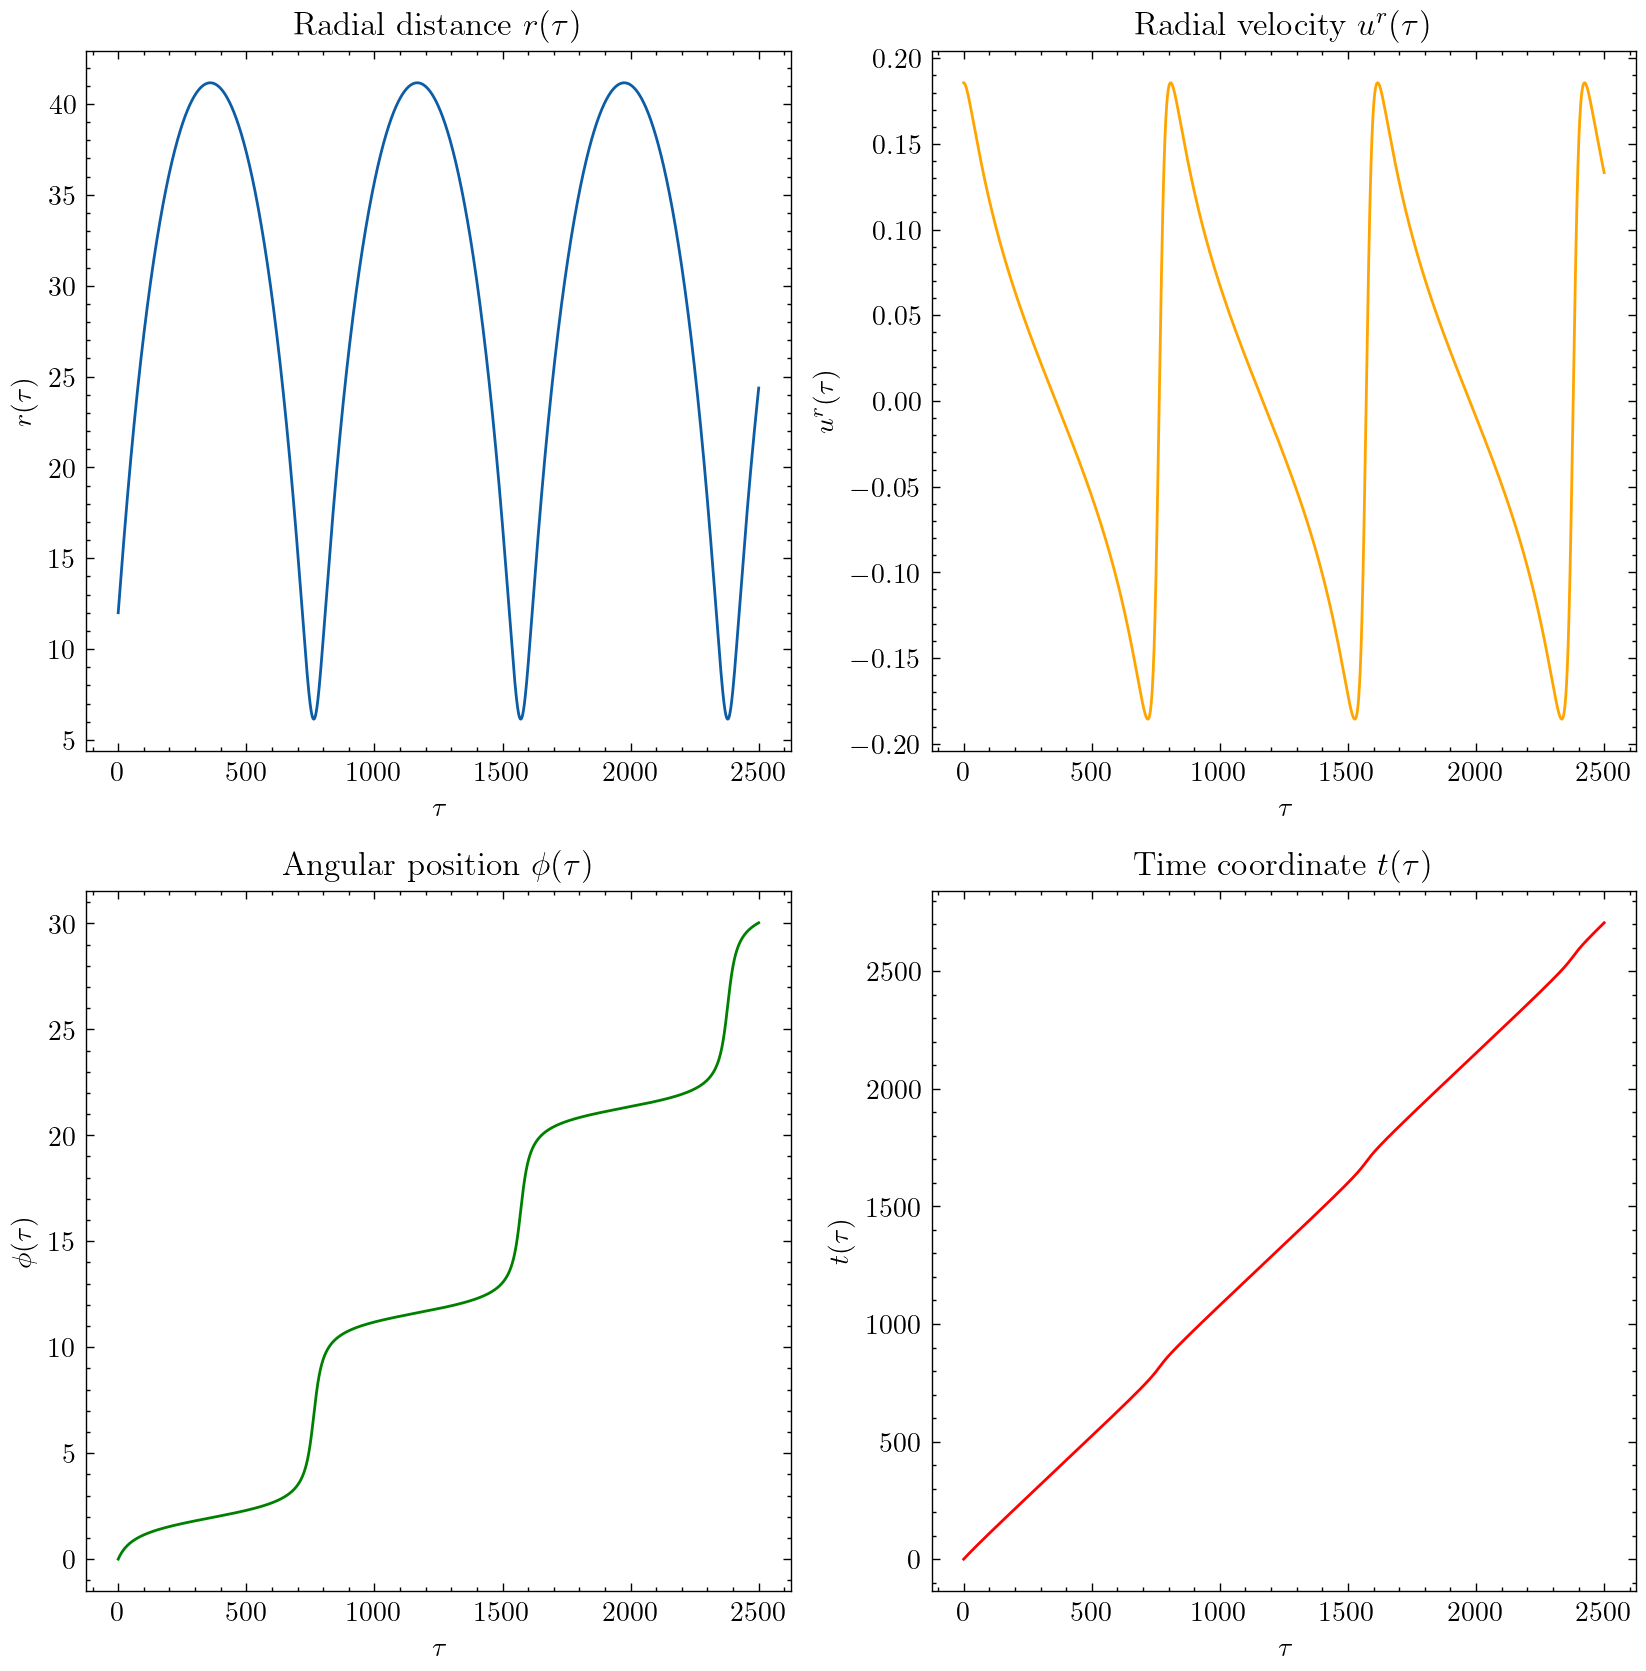

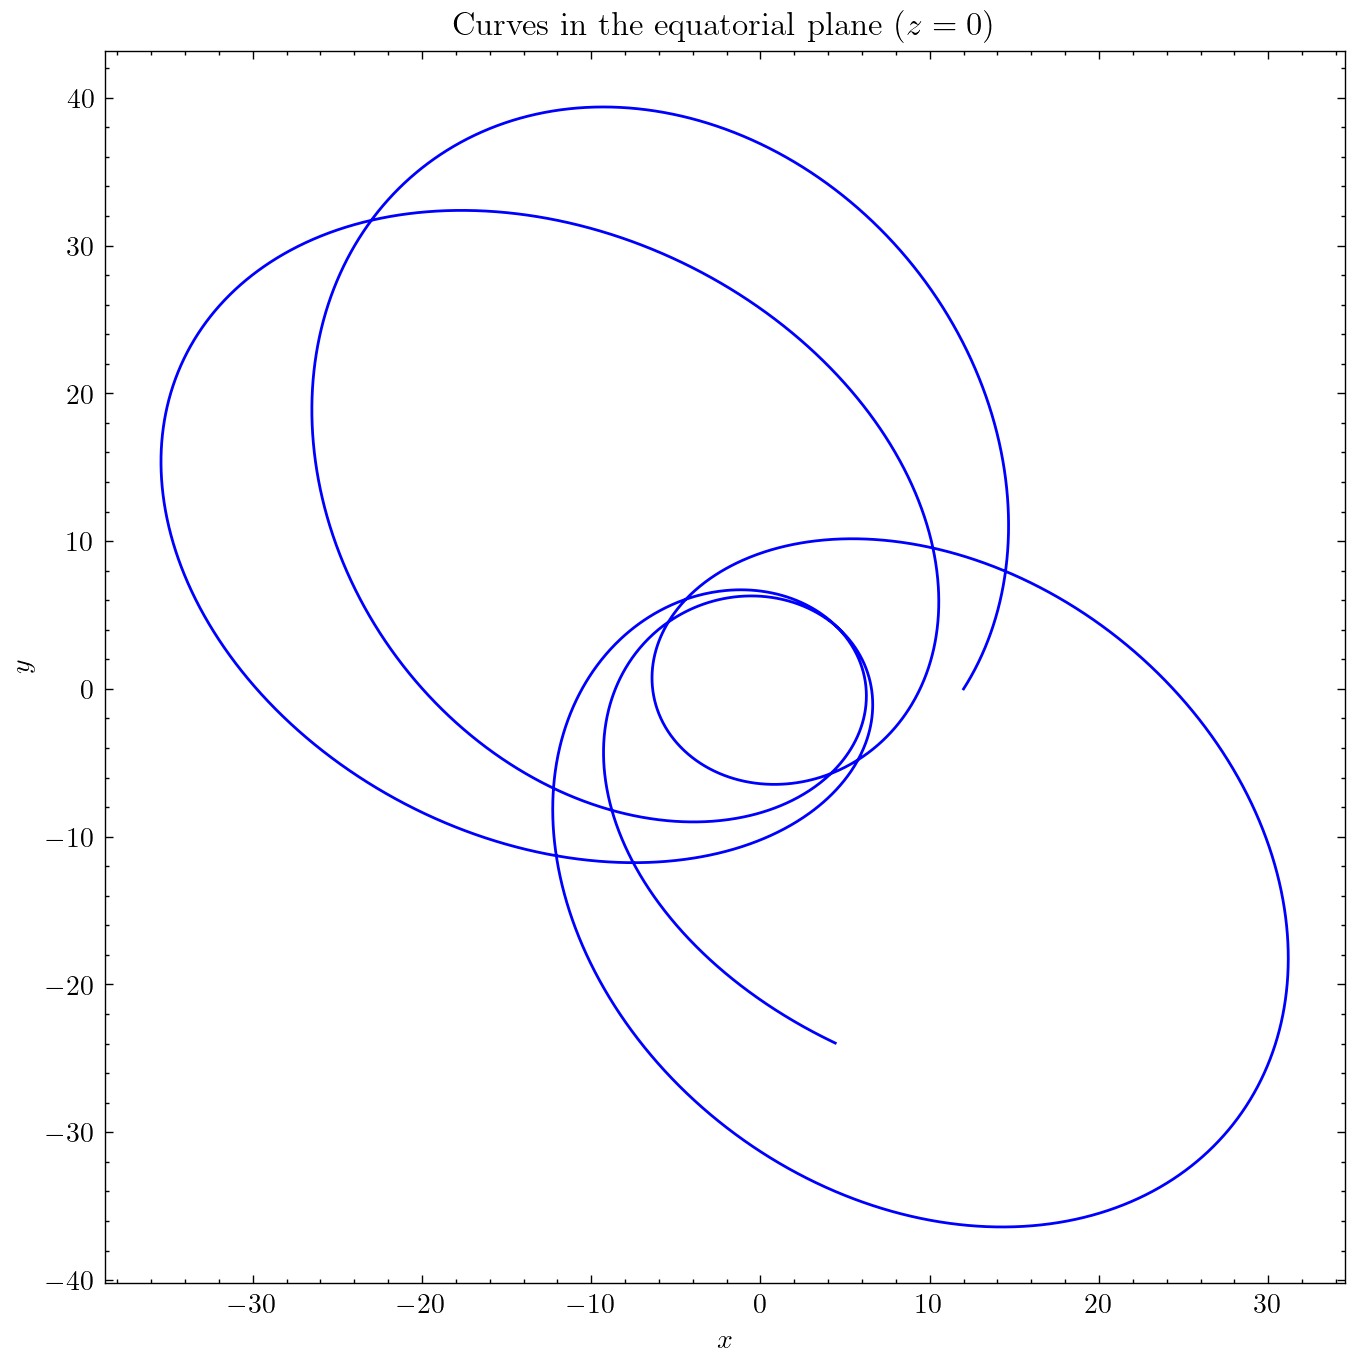

In [4]:
# Give a initial condtion e=0.98, l_z=4*G*M, r_0=12*G*M
solution = solver(e=0.98, l_z=4*G*M, r_0=12*G*M)
sol_t = solution[:, 0]
sol_phi = solution[:, 1]
sol_r = solution[:, 2]
sol_u_r = solution[:, 3]
# Plotting results
plt.figure(figsize=(10,10))

# t vs τ
plt.subplot(2, 2, 4)
plt.plot(tau_eval, sol_t, label=r'$t(\tau)$', color='red')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$t(\tau)$')
plt.title(r'Time coordinate $t(\tau)$')

# φ vs τ
plt.subplot(2, 2, 3)
plt.plot(tau_eval, sol_phi, label=r'$\phi(\tau)$', color='green')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\phi(\tau)$')
plt.title(r'Angular position $\phi(\tau)$')

# r vs tau
plt.subplot(2, 2, 1)
plt.plot(tau_eval, sol_r, label='$r(\tau)$')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$r(\tau)$')
plt.title(r'Radial distance $r(\tau)$')

# ur vs tau
plt.subplot(2, 2, 2)
plt.plot(tau_eval, sol_u_r, label=r'$u^r(\tau)$', color='orange')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$u^r(\tau)$')
plt.title(r'Radial velocity $u^r(\tau)$')

# 2D motion
plt.figure(figsize=(8,8))
plt.plot(sol_r*np.cos(sol_phi), sol_r*np.sin(sol_phi), color='blue')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Curves in the equatorial plane $(z=0)$')

# Problem.1(iii)

r_0=12 l_z_0=4.0 e_0=0.9622504486493764


Text(0.5, 1.0, 'Curves in the equatorial plane $(z=0)$')

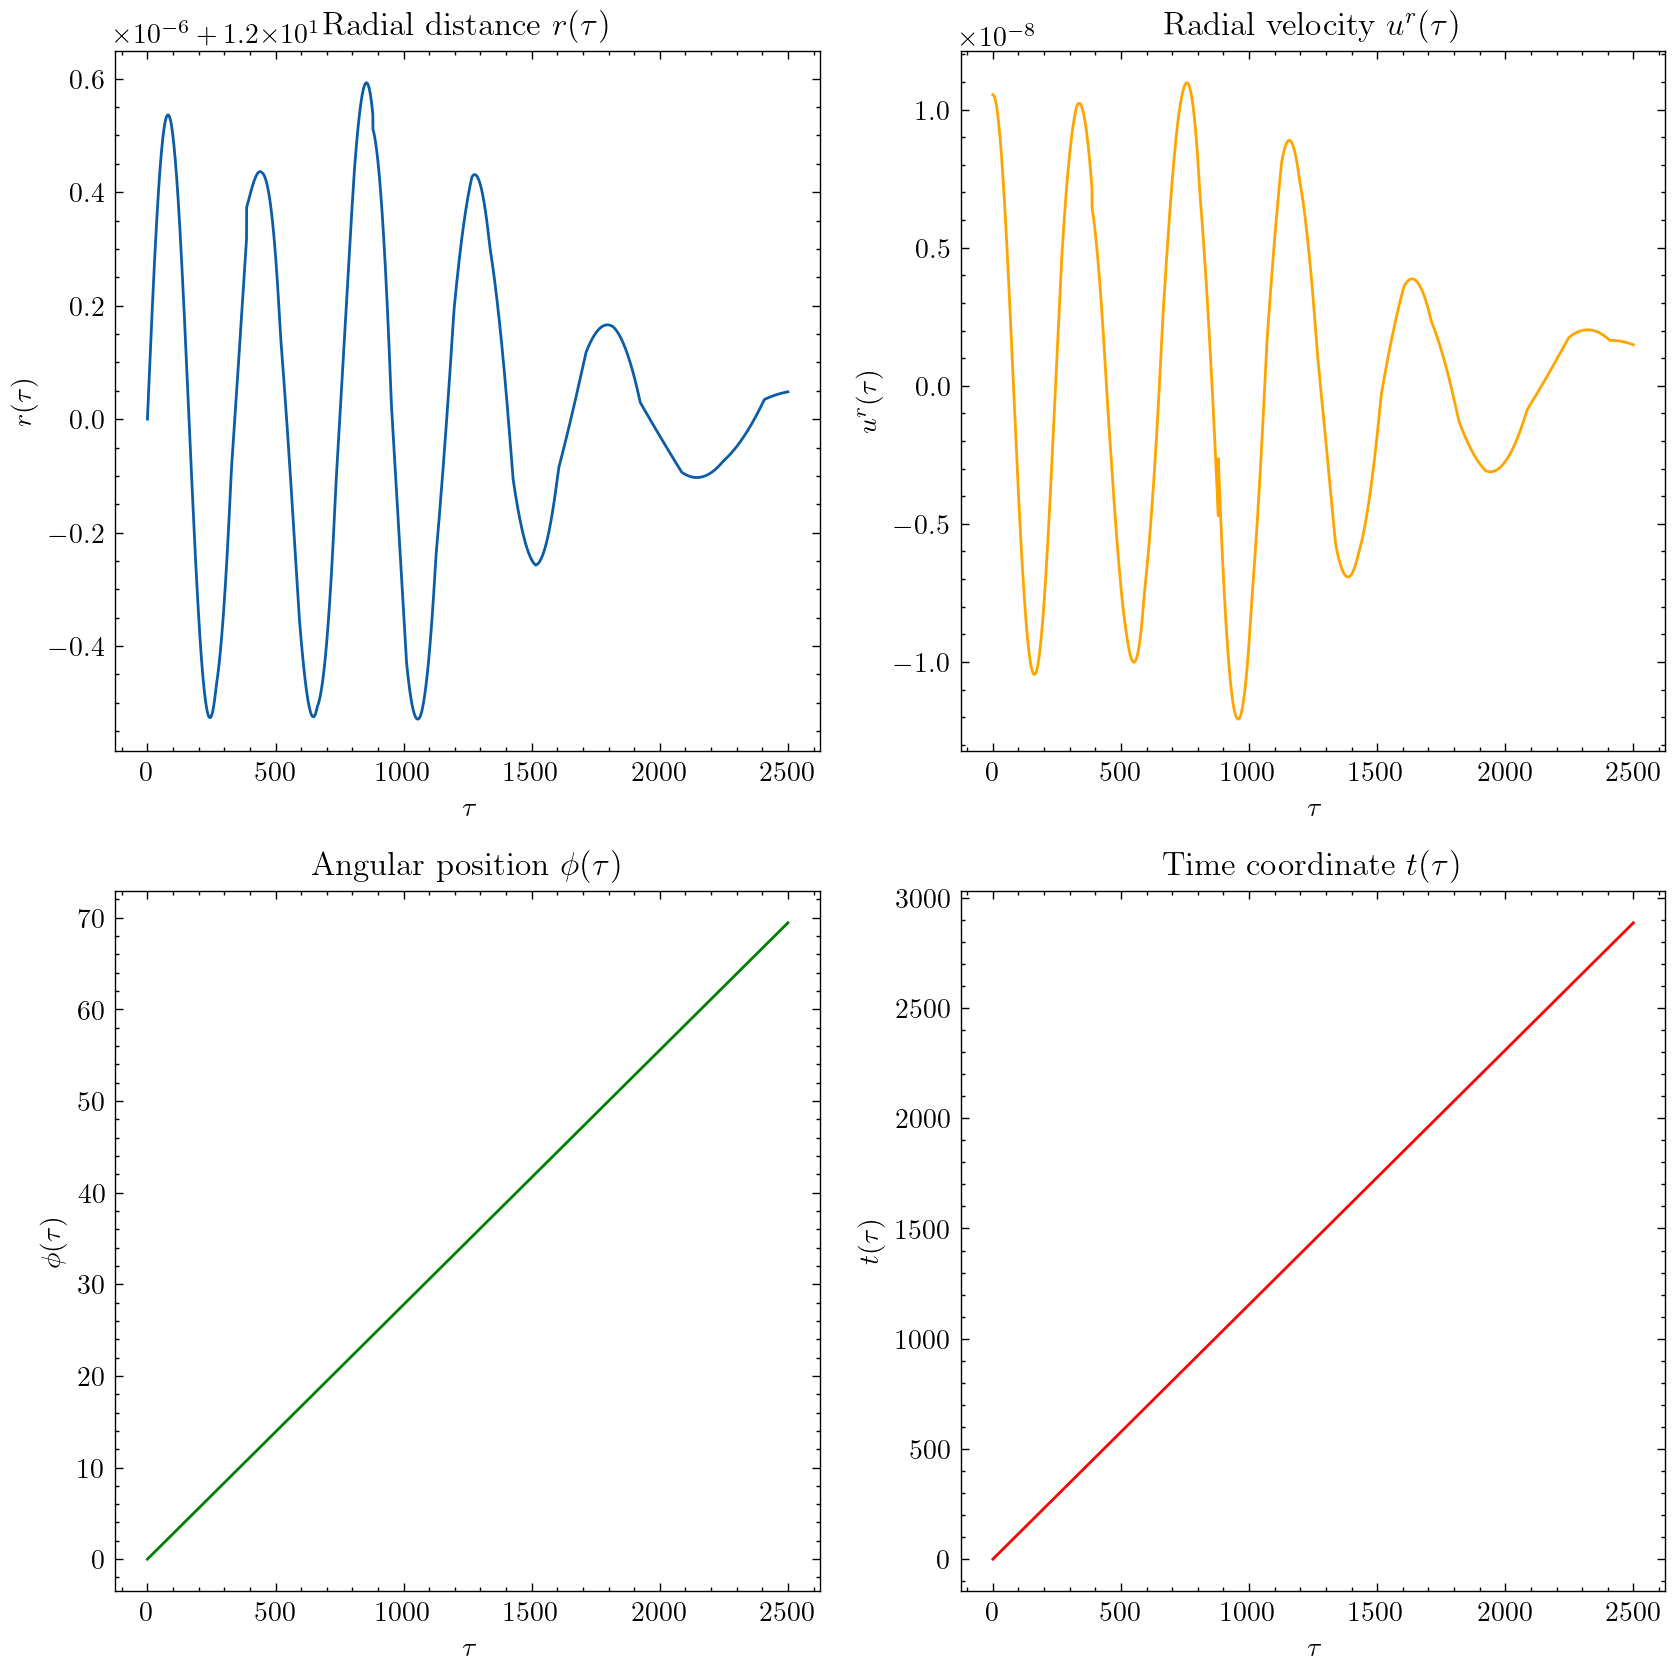

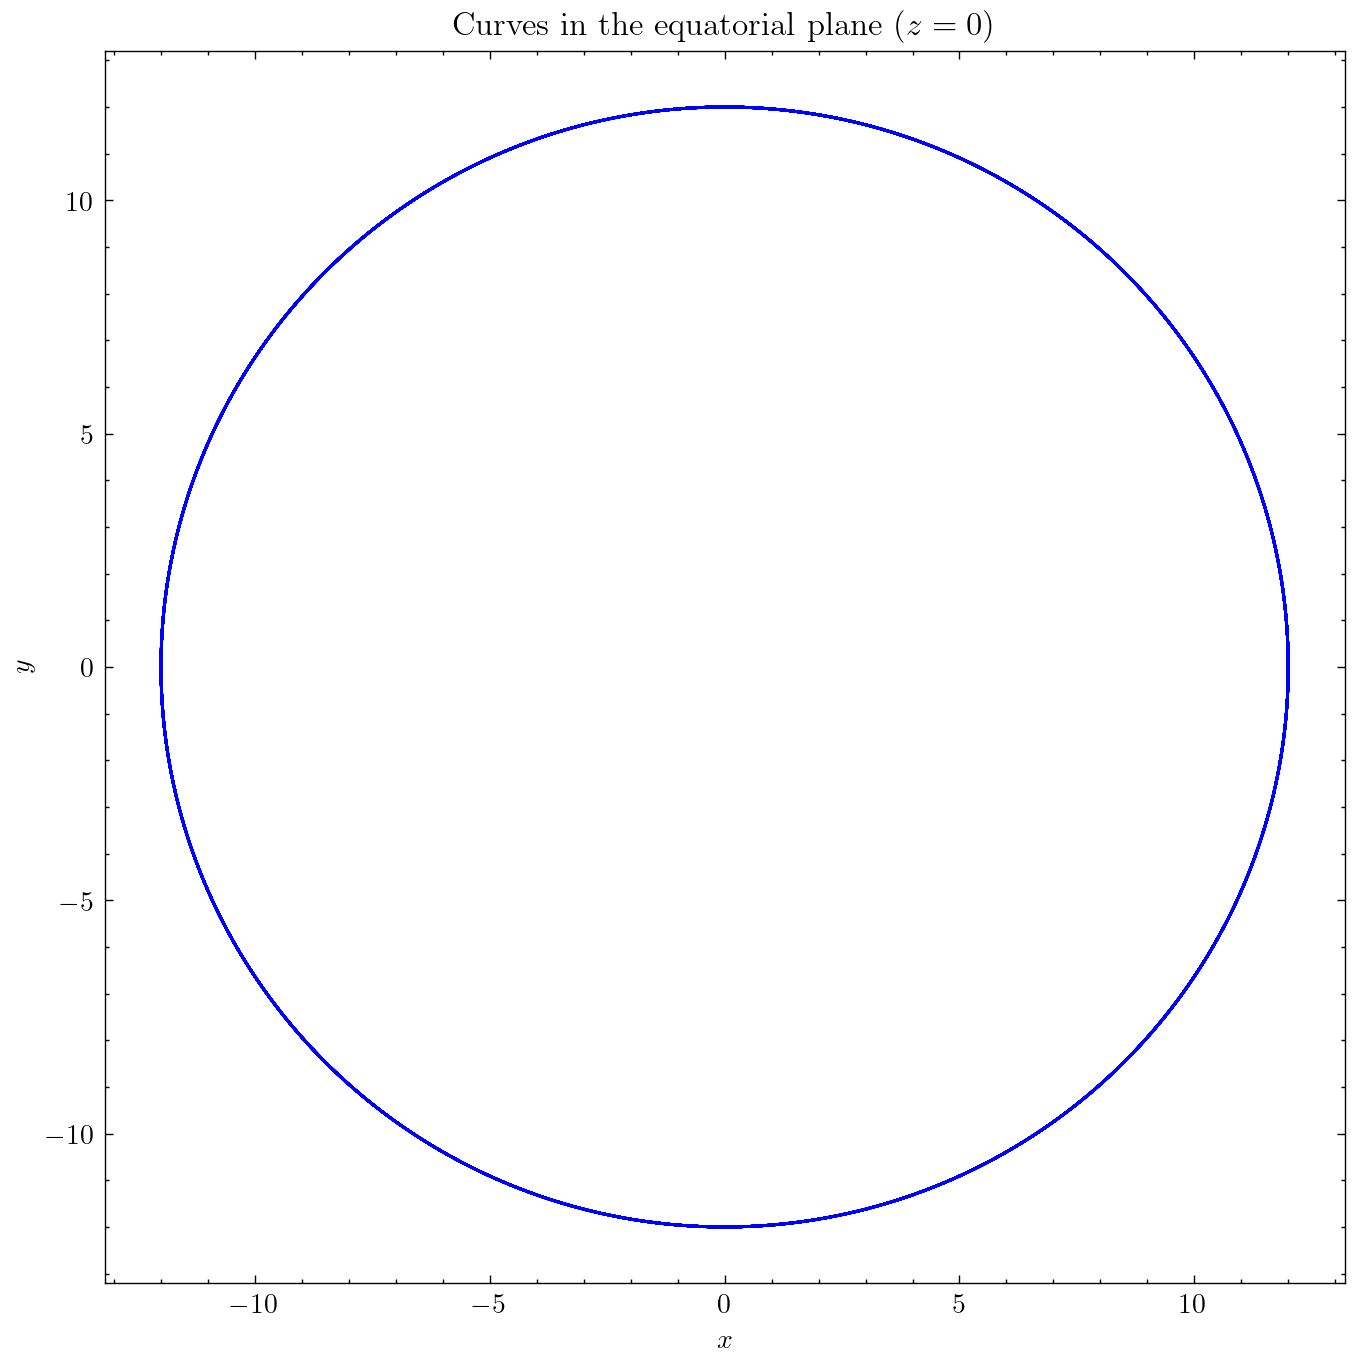

In [5]:
# an appropriate initial condtion at r_0 = 12
r_0 = 12
l_z_0 = np.sqrt(r_0**2/(r_0 - 3))
e_0 = np.sqrt((1 - 2/r_0)*(1/(r_0 - 3) + 1))
print("r_0="+str(r_0), "l_z_0="+str(l_z_0), "e_0="+str(e_0))

# Give an appropriate initial condtion for the orbital motion
solution = solver(e_0, l_z_0, r_0)
sol_t = solution[:, 0]
sol_phi = solution[:, 1]
sol_r = solution[:, 2]
sol_u_r = solution[:, 3]
# Plotting results
plt.figure(figsize=(10,10))

# t vs τ
plt.subplot(2, 2, 4)
plt.plot(tau_eval, sol_t, label=r'$t(\tau)$', color='red')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$t(\tau)$')
plt.title(r'Time coordinate $t(\tau)$')

# φ vs τ
plt.subplot(2, 2, 3)
plt.plot(tau_eval, sol_phi, label=r'$\phi(\tau)$', color='green')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\phi(\tau)$')
plt.title(r'Angular position $\phi(\tau)$')

# r vs tau
plt.subplot(2, 2, 1)
plt.plot(tau_eval, sol_r, label='$r(\tau)$')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$r(\tau)$')
plt.title(r'Radial distance $r(\tau)$')

# ur vs tau
plt.subplot(2, 2, 2)
plt.plot(tau_eval, sol_u_r, label=r'$u_r(\tau)$', color='orange')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$u^r(\tau)$')
plt.title(r'Radial velocity $u^r(\tau)$')

# 2D motion
plt.figure(figsize=(8,8))
plt.plot(sol_r*np.cos(sol_phi), sol_r*np.sin(sol_phi), color='blue')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Curves in the equatorial plane $(z=0)$')

# Problem.2(ii)

In [6]:
#tau_eval = np.linspace(0, 6*np.pi, 10000)
tau_eval = np.linspace(0, 2500, 10000)

# Differential equations
def equations(y, lamda, E, L_z, r_0):
    t, phi, r, pr  = y
    # Equations of motion
    dt_dlamda = E / (1 - 2 / r)
    dphi_dlamda = L_z / r**2
    dr_dlamda = pr
    dpr_dlamda = L_z**2 * (r - 3) / r**4
    
    return [dt_dlamda, dphi_dlamda, dr_dlamda, dpr_dlamda]

def solver(E_0, r_0):
    L_z = E_0 * (1 - 2/r_0) * np.sqrt(r_0 / (r_0 - 3))
    E = - E_0 / np.sqrt(r_0 - 3)
    pr_0 = np.sqrt((E**2) - ((r_0 - 2) / r_0**3) * L_z**2)
    # Initial state vector
    y0 = [0, 0, r_0, pr_0]
    sol = odeint(equations, y0, tau_eval, args=(E, L_z, r_0))
    return sol

Text(0.5, 1.0, 'Curves in the equatorial plane $(z=0)$')

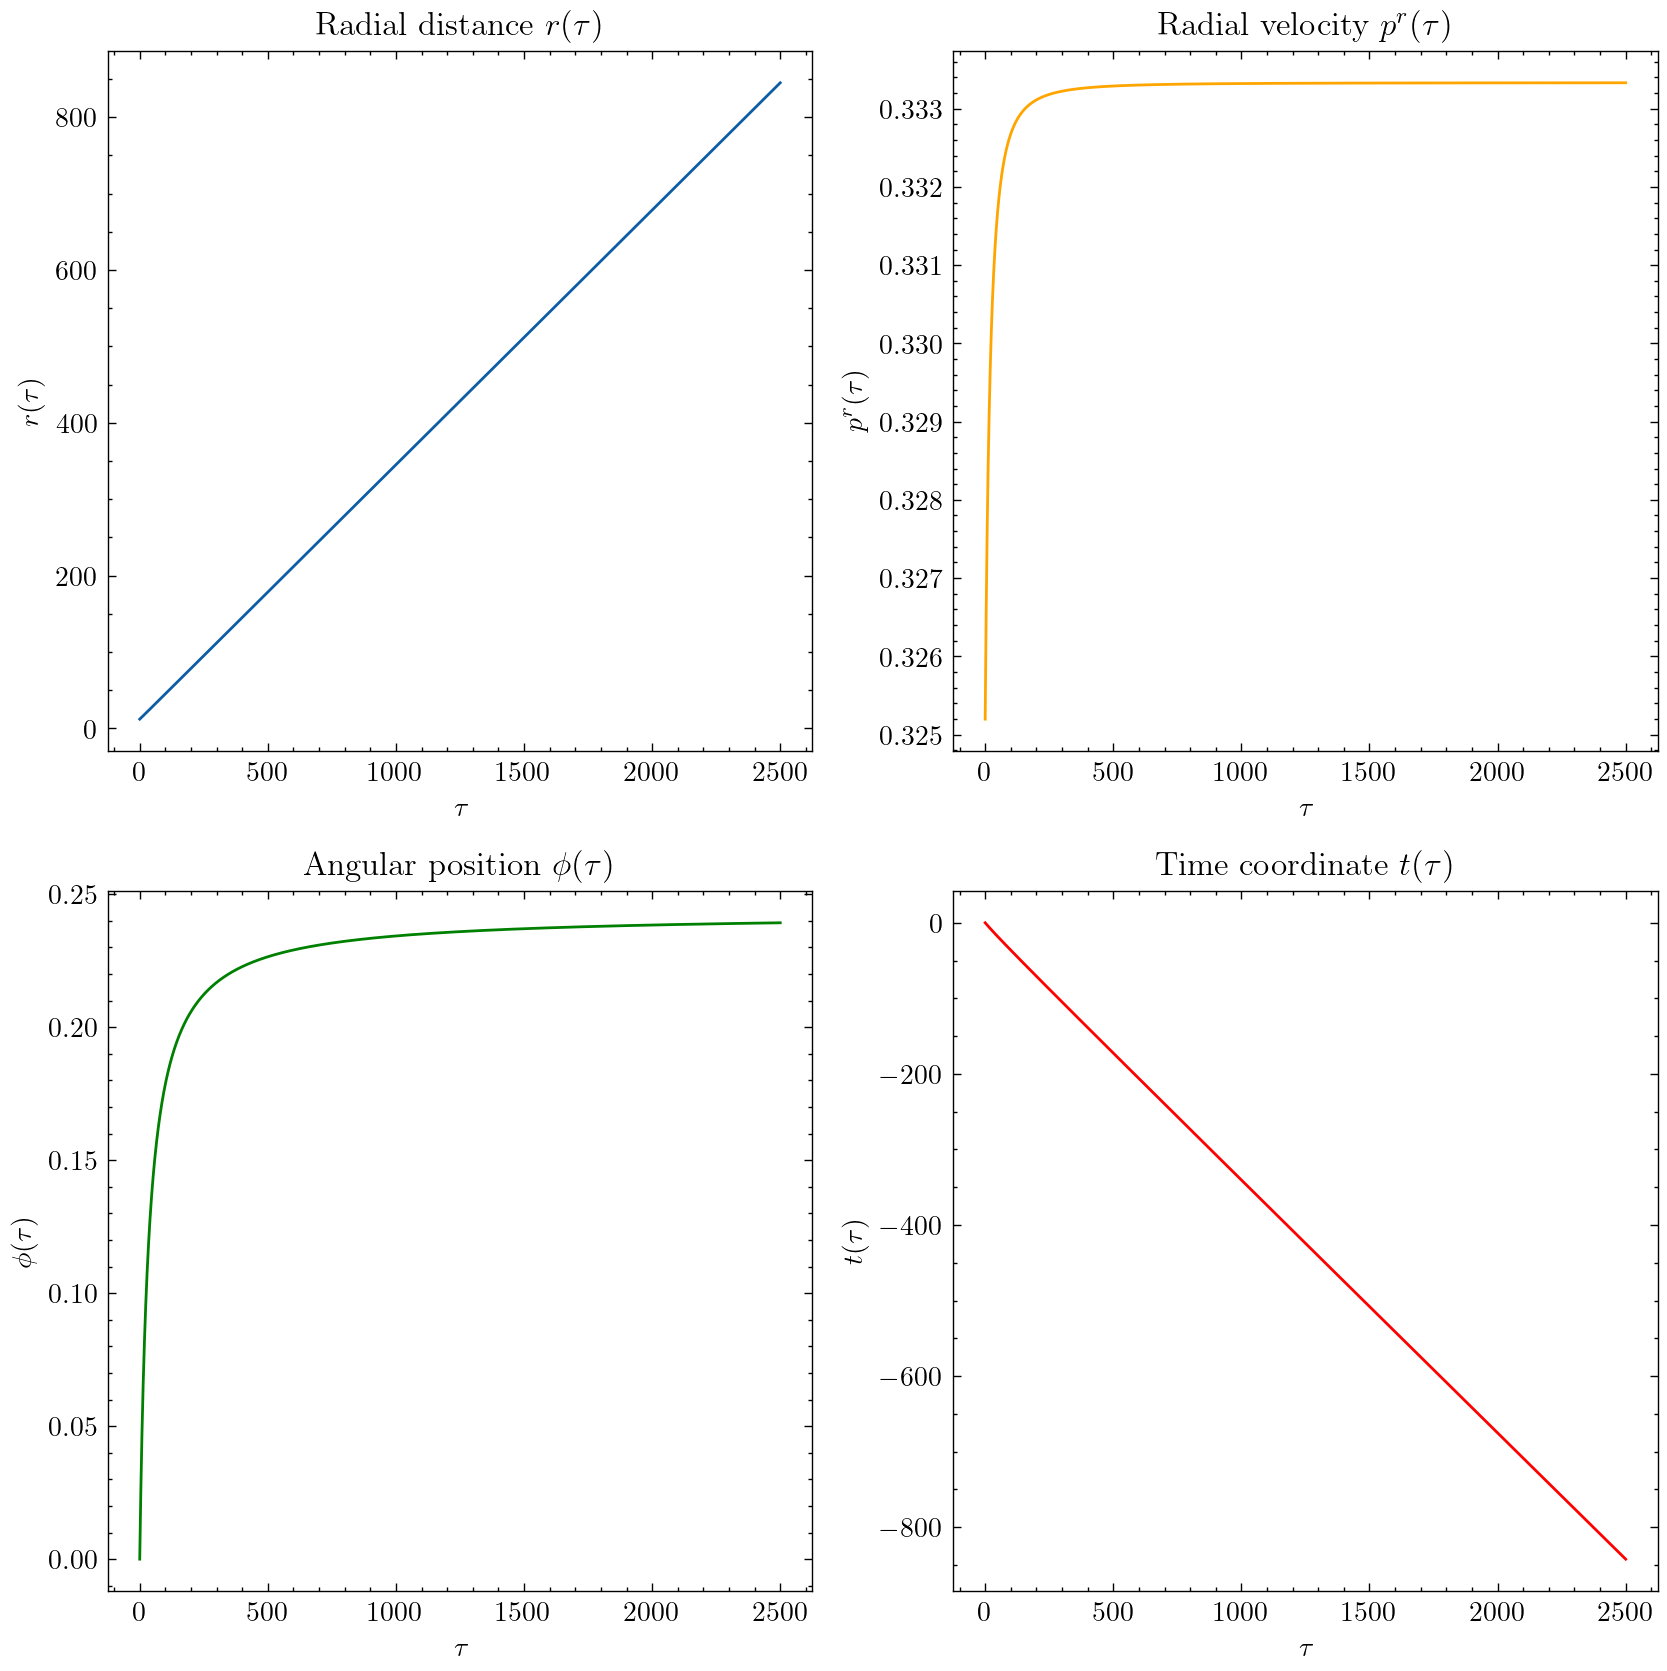

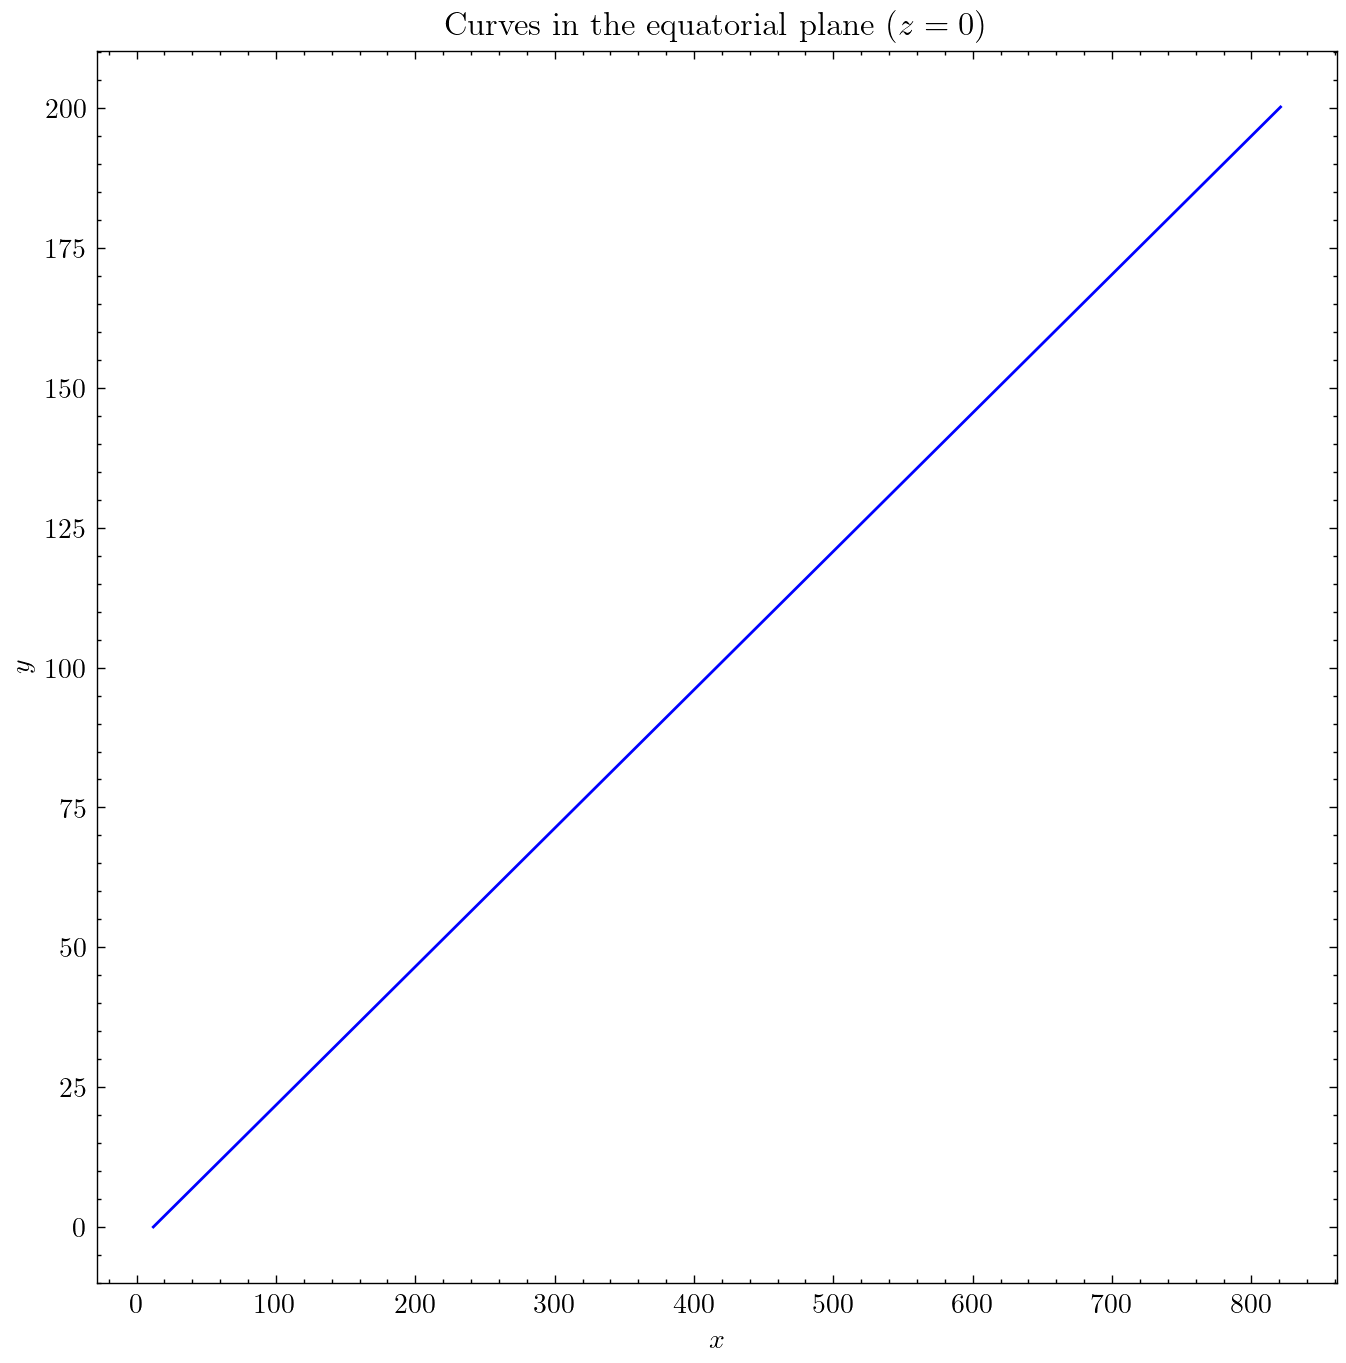

In [7]:
# an appropriate initial condtion at r_0 = 12
r_0 = 12
E_0 = 1 # Chose E_0 as 1!

# Give an appropriate initial condtion for the orbital motion
solution = solver(E_0, r_0)
sol_t = solution[:, 0]
sol_phi = solution[:, 1]
sol_r = solution[:, 2]
sol_p_r = solution[:, 3]
# Plotting results
plt.figure(figsize=(10,10))

# t vs τ
plt.subplot(2, 2, 4)
plt.plot(tau_eval, sol_t, label=r'$t(\tau)$', color='red')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$t(\tau)$')
plt.title(r'Time coordinate $t(\tau)$')

# φ vs τ
plt.subplot(2, 2, 3)
plt.plot(tau_eval, sol_phi, label=r'$\phi(\tau)$', color='green')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$\phi(\tau)$')
plt.title(r'Angular position $\phi(\tau)$')

# r vs tau
plt.subplot(2, 2, 1)
plt.plot(tau_eval, sol_r, label='$r(\tau)$')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$r(\tau)$')
plt.title(r'Radial distance $r(\tau)$')

# pr vs tau
plt.subplot(2, 2, 2)
plt.plot(tau_eval, sol_p_r, label=r'$u_r(\tau)$', color='orange')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$p^r(\tau)$')
plt.title(r'Radial velocity $p^r(\tau)$')

# 2D motion
plt.figure(figsize=(8,8))
plt.plot(sol_r*np.cos(sol_phi), sol_r*np.sin(sol_phi), color='blue')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Curves in the equatorial plane $(z=0)$')